<a href="https://colab.research.google.com/github/rishitharaj/Deep-Learning/blob/main/CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intel Image Classification – CNN

In [ ]:

# STEP 1: Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [ ]:

# Download Dataset
path = kagglehub.dataset_download("puneet6060/intel-image-classification")
print("Downloaded at:", path)


Using Colab cache for faster access to the 'intel-image-classification' dataset.
Downloaded at: /kaggle/input/intel-image-classification


In [ ]:
# Subpaths (Intel dataset structure)

train_dir = os.path.join(path, "seg_train", "seg_train")
test_dir  = os.path.join(path, "seg_test", "seg_test")
pred_dir  = os.path.join(path, "seg_pred", "seg_pred")

# Safety checks

assert os.path.exists(train_dir), "❌ Train dir not found"
assert os.path.exists(test_dir), "❌ Test dir not found"

print("TRAIN DIR:", train_dir)
print("TEST DIR:", test_dir)
print("Classes:", sorted(os.listdir(train_dir)))


TRAIN DIR: /kaggle/input/intel-image-classification/seg_train/seg_train
TEST DIR: /kaggle/input/intel-image-classification/seg_test/seg_test
Classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


Text(0.5, 1.0, 'Sample Image')

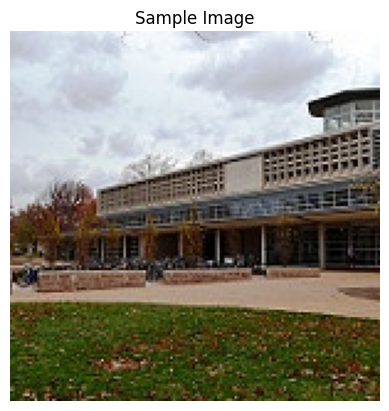

In [ ]:
# Visualize one sample image
sample_dir = os.path.join(train_dir, "buildings")
img_path = os.path.join(sample_dir, os.listdir(sample_dir)[0])
img = load_img(img_path)
plt.imshow(img)
plt.axis("off")
plt.title("Sample Image")


In [ ]:
# Data generators

IMG_SIZE = (150,150)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    subset="validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
# CNN Model

model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(6,activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,830,022 (18.43 MB)

 Trainable params: 4,829,574 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# Train model

callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint("intel_cnn_best.keras", save_best_only=True)
]

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=callbacks
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 625s 2s/step - accuracy: 0.3991 - loss: 5.7758 - val_accuracy: 0.3820 - val_loss: 2.7715
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 621s 2s/step - accuracy: 0.4704 - loss: 1.6836 - val_accuracy: 0.5881 - val_loss: 1.0993
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 616s 2s/step - accuracy: 0.5364 - loss: 1.1987 - val_accuracy: 0.6063 - val_loss: 0.9526
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 610s 2s/step - accuracy: 0.5656 - loss: 1.1191 - val_accuracy: 0.6020 - val_loss: 1.0650
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 609s 2s/step - accuracy: 0.6062 - loss: 1.0257 - val_accuracy: 0.6394 - val_loss: 0.9698
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 604s 2s/step - accuracy: 0.6100 - loss: 1.0363 - val_accuracy: 0.5621 - val_loss: 1.3624
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 607s 2s/step - accuracy: 0.6312 - loss: 0.9621 - val_accuracy: 0.7236 - val_loss: 0.8302
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 620s 2s/step - accuracy: 0.6271 - loss: 0.9747 - val_accu

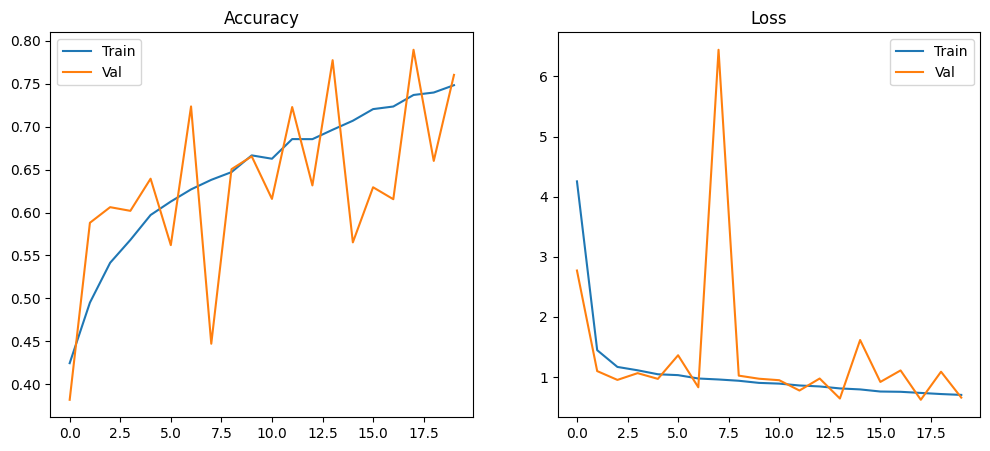

In [ ]:
# Training curves

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.legend()
plt.title("Loss")

plt.show()


In [ ]:
# Evaluation

test_loss, test_acc = model.evaluate(test_generator)
print("Test Accuracy:", test_acc)


94/94 ━━━━━━━━━━━━━━━━━━━━ 35s 376ms/step - accuracy: 0.8644 - loss: 0.4330
Test Accuracy: 0.8503333330154419


94/94 ━━━━━━━━━━━━━━━━━━━━ 36s 385ms/step
              precision    recall  f1-score   support

   buildings       0.82      0.87      0.84       437
      forest       0.95      0.97      0.96       474
     glacier       0.87      0.74      0.80       553
    mountain       0.77      0.82      0.79       525
         sea       0.84      0.89      0.86       510
      street       0.87      0.84      0.86       501

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.85      0.85      0.85      3000



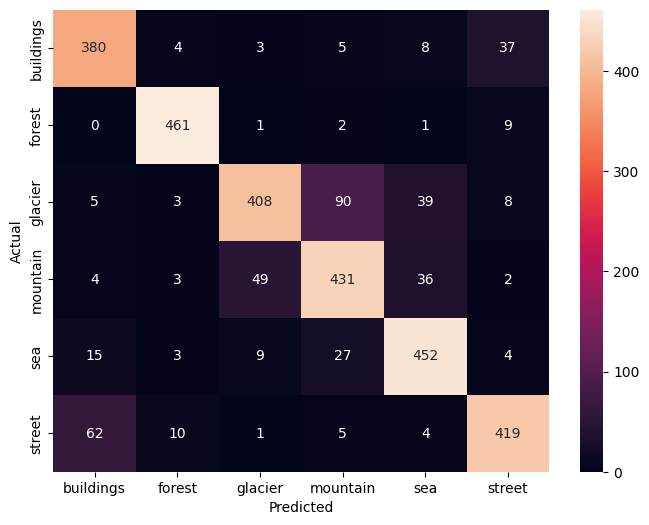

In [ ]:
# Classification report & confusion matrix

y_pred = np.argmax(model.predict(test_generator), axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

print(classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


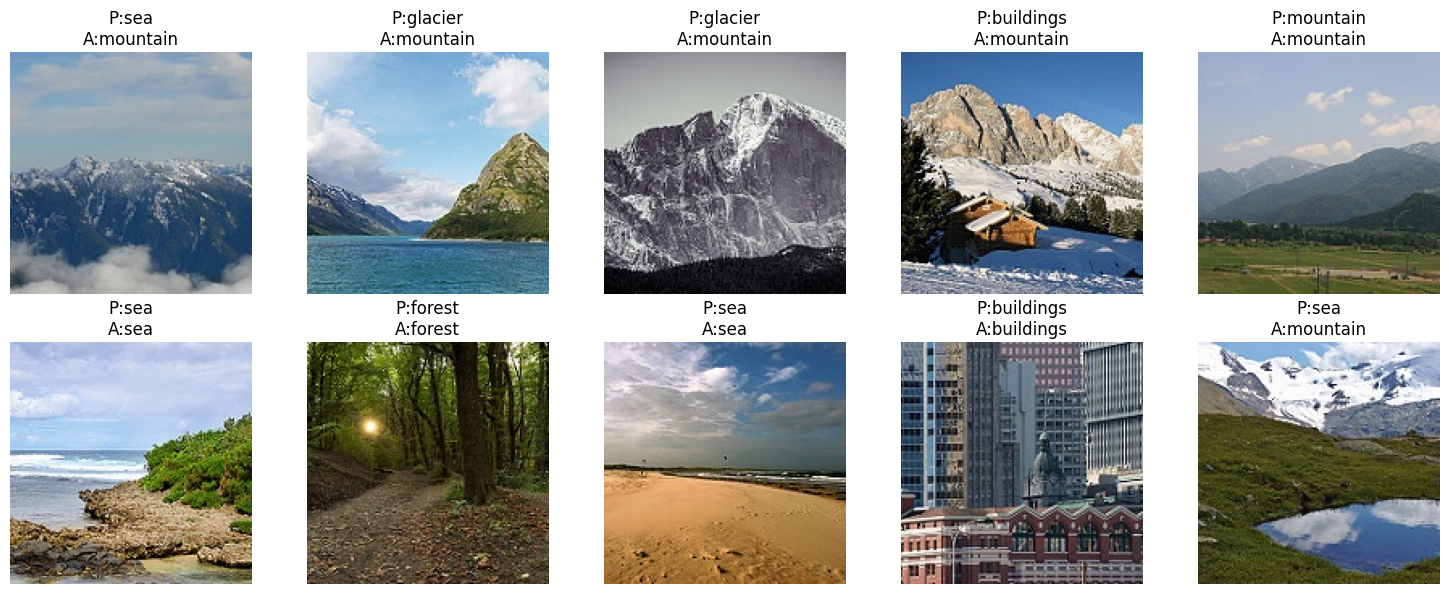

In [ ]:
# Visualize predictions

import random

indices = random.sample(range(len(y_true)), 10)
plt.figure(figsize=(15,6))

for i, idx in enumerate(indices):
    img_path = test_generator.filepaths[idx]
    img = load_img(img_path, target_size=IMG_SIZE)
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.title(f"P:{class_names[y_pred[idx]]}\nA:{class_names[y_true[idx]]}")
    plt.axis("off")

plt.tight_layout()
plt.show()
